<a href="https://colab.research.google.com/github/nepalankit/DeepLearning/blob/main/lab1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Started with Deep Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. SIGMOID FUNCTION
Scales values between 0 and 1



In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Text(0, 0.5, 'sigmoid(x)')

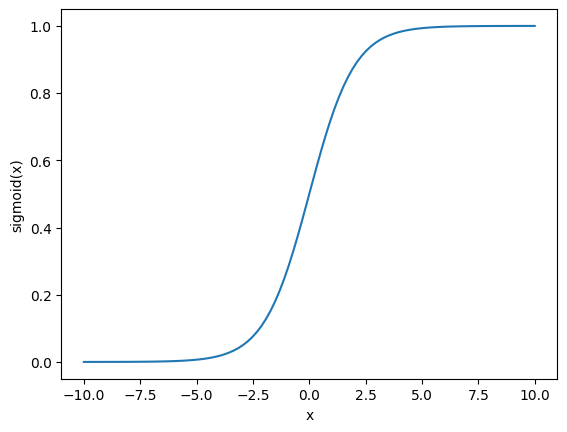

In [ ]:
x_data=np.linspace(-10,10,100)
y_data=sigmoid(x_data)
plt.plot(x_data,y_data)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

#2. Tanh Function
Scales value between -1 to 1

In [ ]:
def tanh(x):
    numerator=1-np.exp(-2*x)
    denominator=1+np.exp(-2*x)
    return numerator/denominator

Text(0, 0.5, 'Tanh(X)')

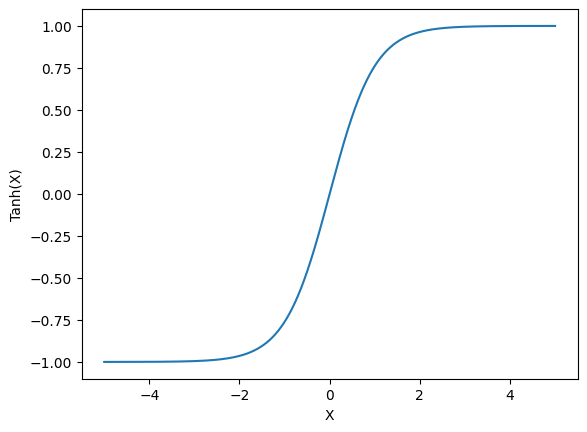

In [ ]:
x_data = np.linspace(-5, 5, 10000)
data_tanh = [tanh(x) for x in x_data]
plt.plot(x_data, data_tanh)
plt.xlabel("X")
plt.ylabel("Tanh(X)")

#3. ReLU(Rectified Linear Unit) Function
- Scales the given value between 0 to infinity.
   f(x)=
    \begin{cases}
      0 , & \text{if}\ x<0 \\
      x, & \text{otherwise}
    \end{cases}
    


In [ ]:
def ReLU(x):
    if x<0:
      return 0
    else:
      return x

Text(0, 0.5, 'ReLU(X)')

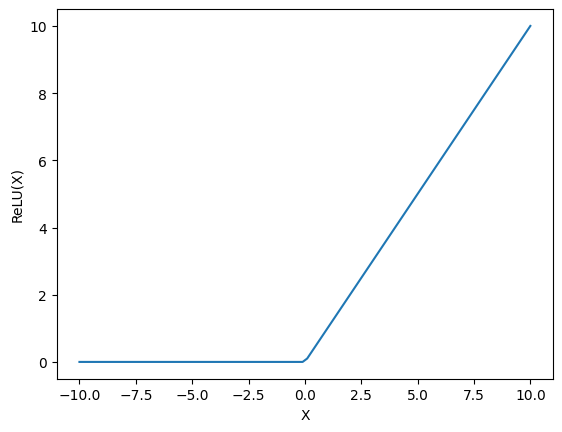

In [ ]:
x_data = np.linspace(-10, 10, 100)
data_ReLU = [ReLU(x) for x in x_data]
plt.plot(x_data, data_ReLU)
plt.xlabel("X")
plt.ylabel("ReLU(X)")

#4.LEAKY ReLU
Works same for x>0 but introduces a small slope(α) for negative values.

In [ ]:
def leaky_ReLU(x,alpha=0.1):
    if x<0:
       return alpha*x
    else:
      return x

Text(0, 0.5, 'leaky_ReLU(x)')

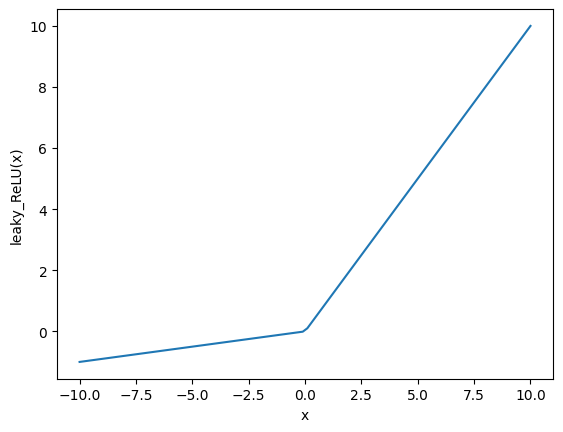

In [ ]:
x_data=np.linspace(-10,10,100)
data_leaky_ReLU=[leaky_ReLU(x,0.1) for x in x_data]
plt.plot(x_data,data_leaky_ReLU)
plt.xlabel('x')
plt.ylabel('leaky_ReLU(x)')

#5. Exponential Linear Unit(ELU)
ELU has snall slope for nagative values. It has log curve.

In [ ]:
def ELU(x,alpha=1):
  if x<0:
    return alpha*(np.exp(x)-1)
  else:
    return x

In [ ]:
x_data=np.linspace(-10,10,100)

Text(0, 0.5, 'ELU(x)')

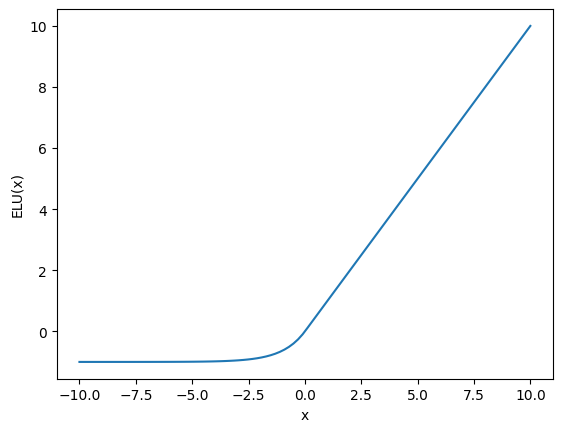

In [ ]:
data_elu=[ELU(x) for x in x_data]
plt.plot(x_data,data_elu)
plt.xlabel('x')
plt.ylabel('ELU(x)')

#6. SWISH function
The swish function is non monotonic i.e. it neither always non increasing nor non decreasing.
- Can also be pramaterized as:
 $$  f(x)= 2x \sigma(\beta x) $$
- For β=0,
 $$  f(x)= x $$
- For β=infinity,
$$  f(x)= 2max(0, x) $$

In [ ]:
def swish(x,beta):
    return 2*x*sigmoid(beta*x)

Text(0.5, 0, 'x')

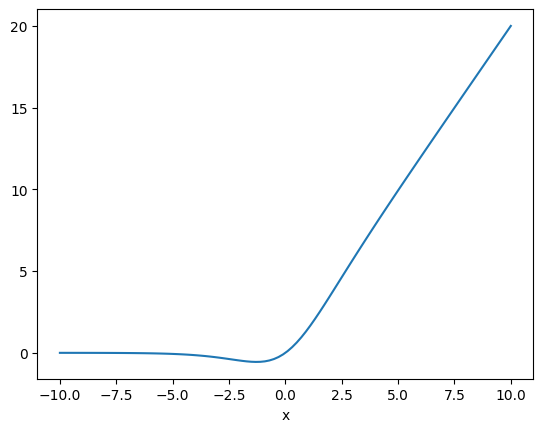

In [ ]:
x_data=np.linspace(-10,10,100)
data_swish=[swish(x,1) for x in x_data]
plt.plot(x_data,data_swish)
plt.xlabel('x')

#7. Softmax function
It is the generalization of sigmoid function usually applied to final layer of network.
 $$ f(x_i) = \frac{e^{x_i}}{\Sigma _j e^{x_j}} $$
 $$ \begin{bmatrix}
 0.5 \\
 1.3 \\
 1.1 \\
 \end{bmatrix}
 \text{ ---[SOFTMAX]---> }
 \begin{bmatrix}
 0.198 \\
 1.440 \\
 1.360 \\
 \end{bmatrix}
 $$

In [ ]:
def softmax(x):
  return np.exp(x)/np.exp(x).sum(axis=0)

In [ ]:
z=np.array([2,1,0.1])

In [ ]:
softmax_values=softmax(z)

In [ ]:
print("Softmax Output:", softmax_values)
print("Sum of probabilities:", np.sum(softmax_values))

Softmax Output: [0.65900114 0.24243297 0.09856589]
Sum of probabilities: 1.0


#Forward Propagation


In [ ]:
def forward_prop(x,whx,why):
  z1=np.dot(x,whx)+bh
  a1=sigmoid(z1)
  z2=np.dot(a1,why)+by
  y_hat=sigmoid(z2)
  return z1,a1,z2,y_hat

#How does ANN learn?

In [ ]:
def backward_prop(y_hat,z1,a1,z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy


#Building a neural network from stratch

- To perform the XOR gate operation, we build a simple two-layer neural
network.
- we have an
input layer with two nodes: a hidden layer with five nodes and an output
layer comprising one node

Define X-OR Truth table

In [ ]:
X = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

Define the number of nodes in each layer:

In [ ]:
num_input = 2
num_hidden = 5
num_output = 1

Initialize the weights and bias randomly. First, we initialize the input to
hidden layer weights

In [ ]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

we initialize the hidden to output layer weights:

In [ ]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

Define the derivative of the sigmoid function:

In [ ]:
def sigmoid_derivative(z):
  return np.exp(-z)/((1+np.exp(-z))**2)

Define cost function

In [ ]:
def cost_function(y, y_hat):
  J = 0.5*sum((y-y_hat)**2)
  return J

Set the learning rate and the number of training iterations:

In [ ]:
alpha = 0.01
num_iterations = 5000

Now, let's start training the network with the following code:

In [ ]:
cost =[]
for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)
    #update weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
    #compute cost
    c = cost_function(y, y_hat)
    cost.append(c)

Plot the cost function

Text(0, 0.5, 'Cost')

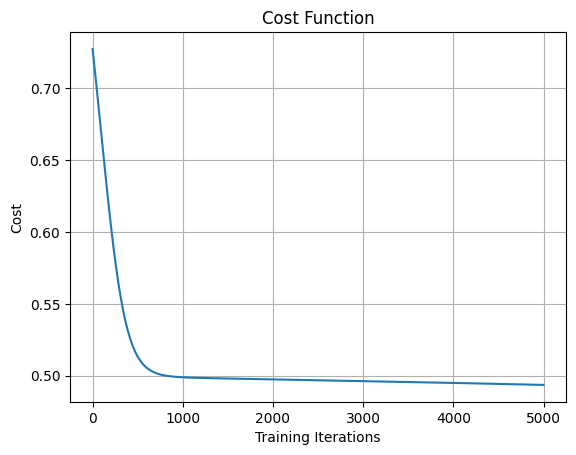

In [ ]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

- The above graph indicates that as the number of training interations increases the cost function decreases.
- The constant value indicates that the model has stopped learning or it may be learning slowly.